## To read the json file and it's context:


In [1]:
import json

with open("output3.json", "r", encoding='utf-8') as file:
    data = json.load(file)
file.close()

In [2]:
data_copy = data.copy
for item in data:
    item["title"] = item["title"].strip("12345()")
    if "tags" in item.keys():
        item["tags"] = [tag.strip("12345()") for tag in item["tags"]]

In [3]:
all_tags = list()
for item in data:
    if "tags" in item.keys():
        [all_tags.append(tag) for tag in item["tags"]]

titles = list()
for item in data:
    titles.append(item["title"])

In [4]:
print(len(titles))
print(len(all_tags))

unique_tags = list(set(all_tags))
print(len(unique_tags))

266
1641
346


## To create Adjacency Matrix for title-tag Network:


In [5]:
import numpy as np
title_tag_adjacency_matrix = np.zeros((len(titles), len(unique_tags)))
tags_indices = {word:index for index, word in enumerate(unique_tags)}
title_indices = {title:index for index, title in enumerate(titles)}

In [6]:
for item in data:
    if "tags" in item.keys():
        index1 = title_indices[item["title"]]
        for i in range(len(item["tags"])):
            tag = item["tags"][i]
            index2 = tags_indices[tag]
            title_tag_adjacency_matrix[index1][index2] = 1

file_path = 'title-tag_adjacency_matrix.txt'
np.savetxt(file_path, title_tag_adjacency_matrix, fmt='%d')

## To create Adjacency Matrix for co-word Network:

In [7]:
import numpy as np
coword_adjacency_matrix = np.zeros((len(unique_tags), len(unique_tags)))

In [8]:
for item in data:
    if "tags" in item.keys():
        for i in range(len(item["tags"])):
            for j in range(i+1, len(item["tags"])):
                tag1 = item["tags"][i]
                tag2 = item["tags"][j]
                index1 = tags_indices[tag1]
                index2 = tags_indices[tag2]
                coword_adjacency_matrix[index1][index2] = 1
                coword_adjacency_matrix[index2][index1] = 1

file_path = 'co-word_adjacency_matrix.txt'
np.savetxt(file_path, coword_adjacency_matrix, fmt='%d')

In [9]:
import pandas as pd
title_tag_dataframe = pd.DataFrame(title_tag_adjacency_matrix, columns=unique_tags, index=titles)

# Save the DataFrame to a file
file_path = 'title-tag_adjacency_matrix.csv'
title_tag_dataframe.to_csv(file_path)

In [10]:
import pandas as pd
coword_dataframe = pd.DataFrame(coword_adjacency_matrix, columns=unique_tags, index=unique_tags)

# Save the DataFrame to a file
file_path = 'coword_adjacency_matrix.csv'
coword_dataframe.to_csv(file_path)

### To Create the edge list:

In [11]:
tag_title_edge_list = np.transpose(np.nonzero(title_tag_adjacency_matrix)).tolist()
# tag_title_edge_list

### To Create sparse matrix:

In [12]:
from scipy.sparse import coo_matrix
num_nodes = np.max(tag_title_edge_list) + 1
source_nodes, target_nodes = zip(*tag_title_edge_list)
sparse_matrix = coo_matrix((np.ones(len(tag_title_edge_list)), (source_nodes, target_nodes)), shape=(num_nodes, num_nodes))

print(sparse_matrix)

  (0, 47)	1.0
  (0, 153)	1.0
  (0, 312)	1.0
  (1, 126)	1.0
  (1, 193)	1.0
  (1, 268)	1.0
  (1, 328)	1.0
  (2, 83)	1.0
  (2, 262)	1.0
  (2, 285)	1.0
  (2, 288)	1.0
  (3, 161)	1.0
  (3, 296)	1.0
  (4, 90)	1.0
  (4, 91)	1.0
  (4, 292)	1.0
  (4, 334)	1.0
  (4, 337)	1.0
  (5, 12)	1.0
  (5, 25)	1.0
  (5, 149)	1.0
  (6, 11)	1.0
  (6, 101)	1.0
  (6, 288)	1.0
  (7, 87)	1.0
  :	:
  (263, 157)	1.0
  (263, 189)	1.0
  (263, 289)	1.0
  (263, 332)	1.0
  (263, 333)	1.0
  (264, 33)	1.0
  (264, 35)	1.0
  (264, 77)	1.0
  (264, 114)	1.0
  (264, 122)	1.0
  (264, 157)	1.0
  (264, 189)	1.0
  (264, 289)	1.0
  (264, 332)	1.0
  (264, 333)	1.0
  (265, 33)	1.0
  (265, 35)	1.0
  (265, 77)	1.0
  (265, 114)	1.0
  (265, 122)	1.0
  (265, 157)	1.0
  (265, 189)	1.0
  (265, 289)	1.0
  (265, 332)	1.0
  (265, 333)	1.0


In [13]:
co_word_sparse = sparse_matrix * sparse_matrix
print(co_word_sparse)

  (0, 323)	1.0
  (0, 249)	1.0
  (0, 245)	1.0
  (0, 239)	1.0
  (0, 217)	1.0
  (0, 148)	1.0
  (0, 101)	1.0
  (0, 78)	1.0
  (0, 281)	1.0
  (0, 272)	1.0
  (0, 70)	1.0
  (0, 3)	1.0
  (1, 230)	1.0
  (1, 204)	1.0
  (1, 140)	1.0
  (1, 135)	1.0
  (1, 60)	1.0
  (1, 39)	1.0
  (1, 13)	1.0
  (2, 333)	1.0
  (2, 332)	1.0
  (2, 289)	1.0
  (2, 189)	1.0
  (2, 157)	1.0
  (2, 122)	1.0
  :	:
  (265, 78)	1.0
  (265, 280)	1.0
  (265, 220)	1.0
  (265, 180)	1.0
  (265, 143)	1.0
  (265, 64)	1.0
  (265, 38)	1.0
  (265, 21)	1.0
  (265, 232)	1.0
  (265, 229)	1.0
  (265, 215)	1.0
  (265, 159)	1.0
  (265, 117)	1.0
  (265, 101)	2.0
  (265, 50)	1.0
  (265, 10)	1.0
  (265, 8)	1.0
  (265, 276)	1.0
  (265, 219)	1.0
  (265, 212)	1.0
  (265, 163)	1.0
  (265, 89)	1.0
  (265, 68)	1.0
  (265, 2)	1.0
  (265, 75)	2.0


### To draw the graph:

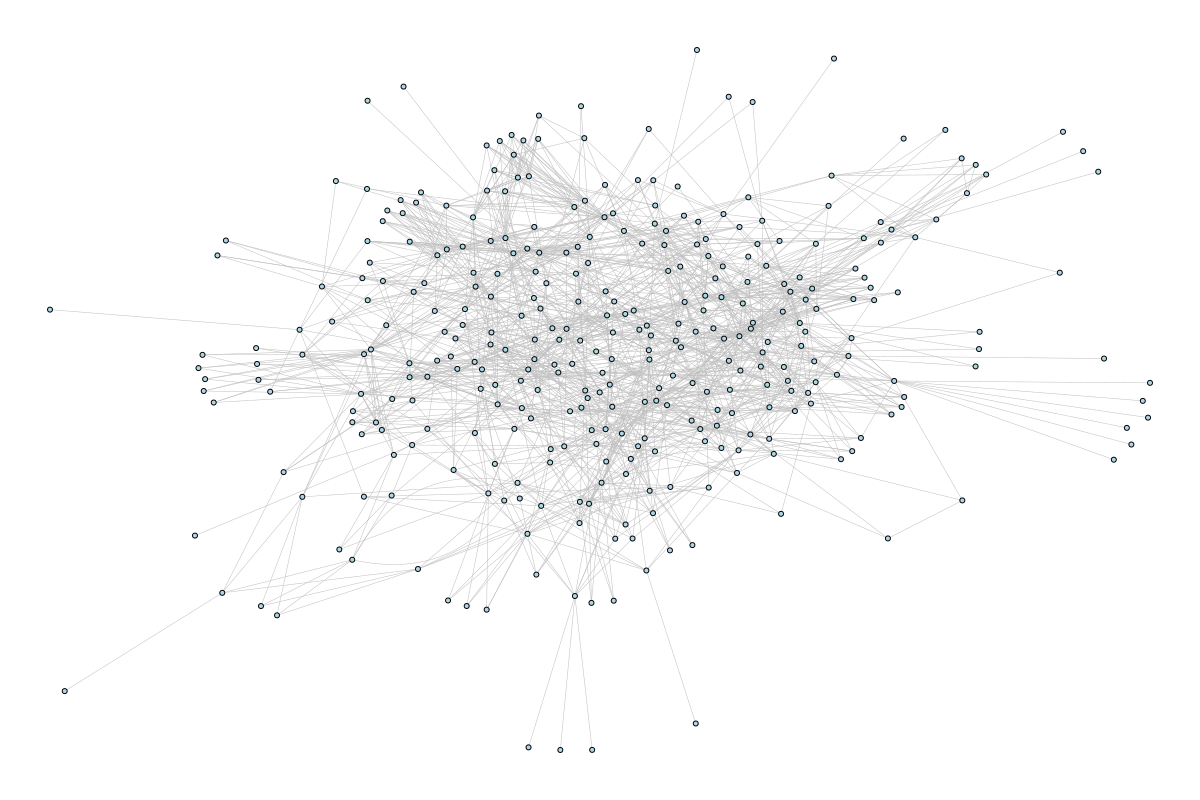

In [14]:
import igraph as ig
graph = ig.Graph.Adjacency(sparse_matrix.todense().tolist())
graph.es["arrow_size"] = 0.001

layout = graph.layout_fruchterman_reingold()
ig.plot(graph, bbox=(0, 0, 1200, 800), area=3500, vertex_size=5, vertex_color='lightblue', edge_color='gray', edge_width=0.5, arrow_size=graph.es["arrow_size"], margin=50)